In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.api.models import Sequential
from keras.api.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import biosppy

2024-12-14 13:23:56.668852: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-14 13:23:56.678317: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734179036.689697  124010 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734179036.693081  124010 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-14 13:23:56.704649: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        sequences.append(sequence)
    return np.array(sequences)

def create_labels(data, seq_length):
    labels = []
    for i in range(len(data) - seq_length):
        if 1 in data[i:i + seq_length]:
          labels.append(1)
        else:
          labels.append(0)
    return np.array(labels)


# Load data
1. forhead right
2. temple right (skroń)
3. middle (bad signal)
4. back (bad signal)
5. forhead left
6. temple left (skroń)

In [3]:
from biosppy.signals import eeg
sample_name = 'marek_05_03_2024_fourth.txt'
x=np.transpose(np.loadtxt(sample_name)[:,5:11])


In [4]:
frequencies = [eeg.eeg(signal=i, sampling_rate=100., show=False) for i in x]

In [5]:
electrodes_dict = {0 : "czoło prawe",
                   1 : "skron prawa",
                   2 : "srodek",
                   3 : "tyl",
                   4 : "czolo lewe",
                   5 : "skron lewa"}

In [6]:
def show_plots(name, electrode=0):
  plt.figure(figsize=(30,3))
  plt.plot(frequencies[electrode][name])
  plt.title(name + "-" + electrodes_dict[electrode])


In [7]:
len(frequencies[0])

10

In [8]:
len(frequencies[0]["alpha_low"])

2260

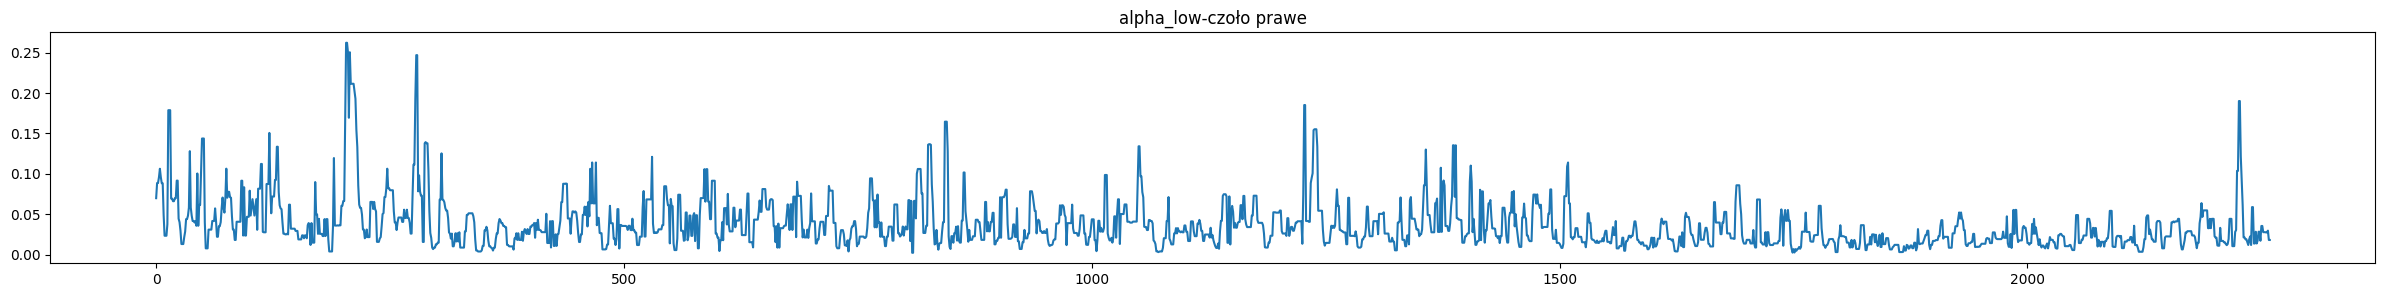

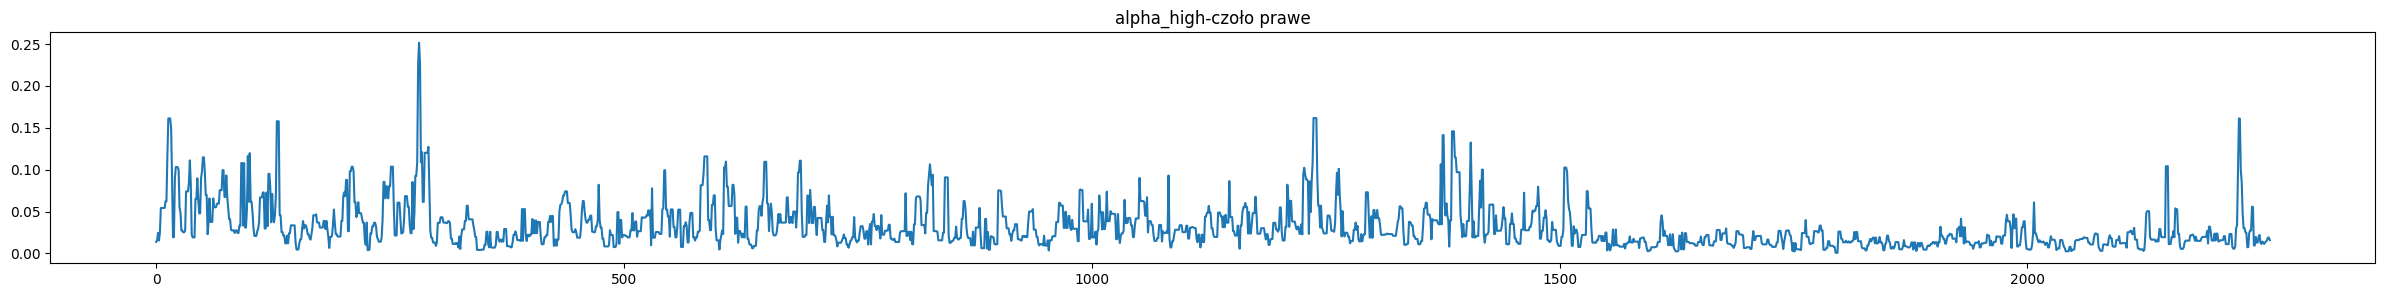

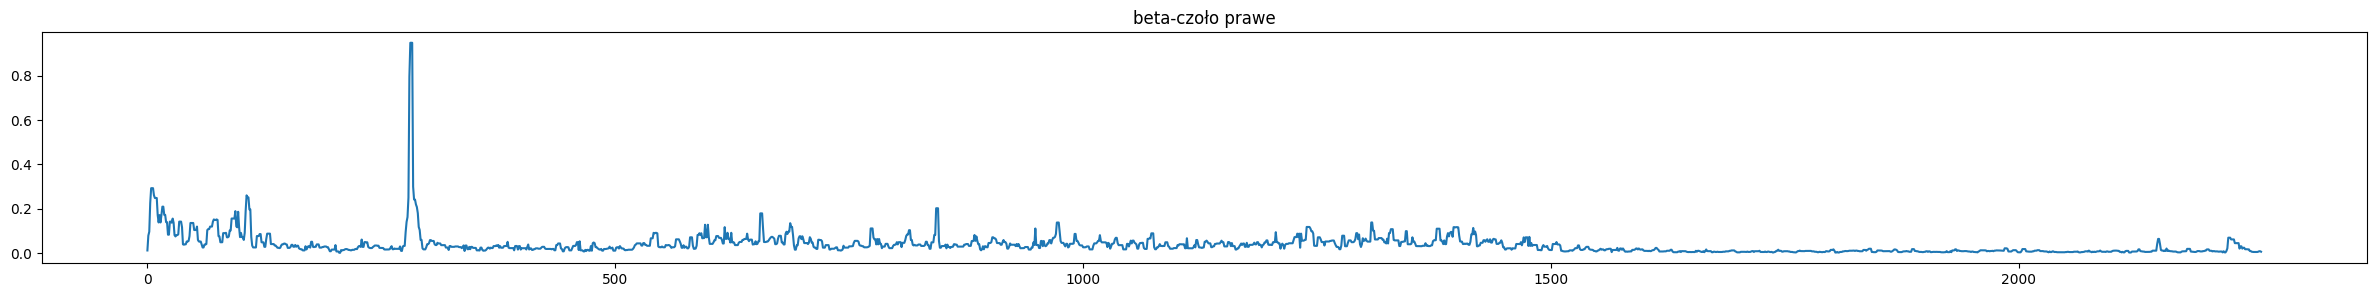

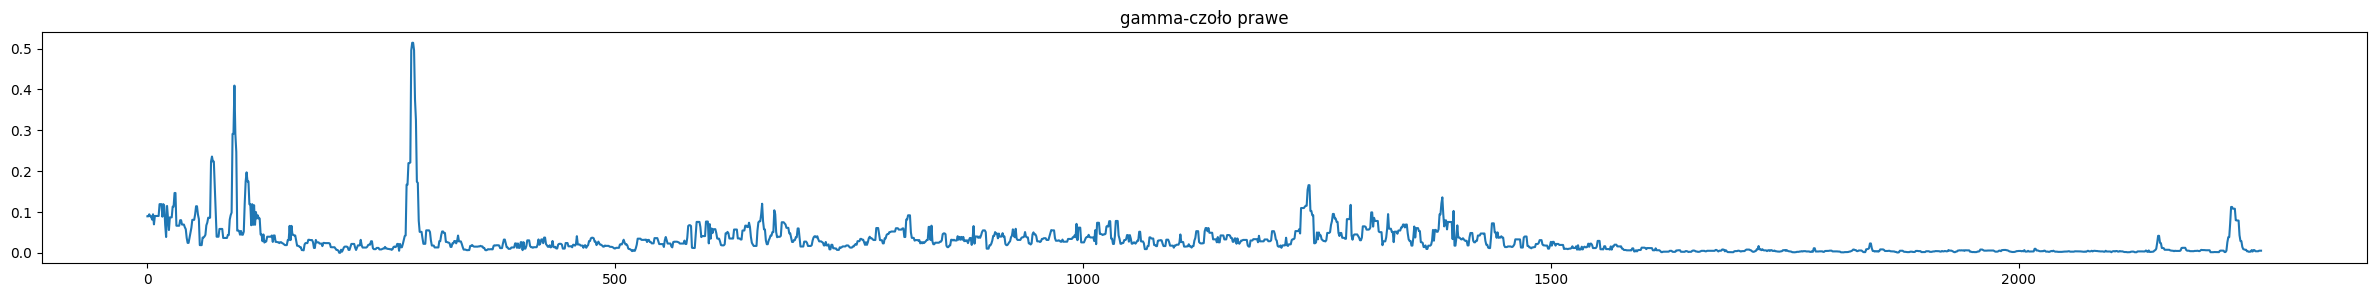

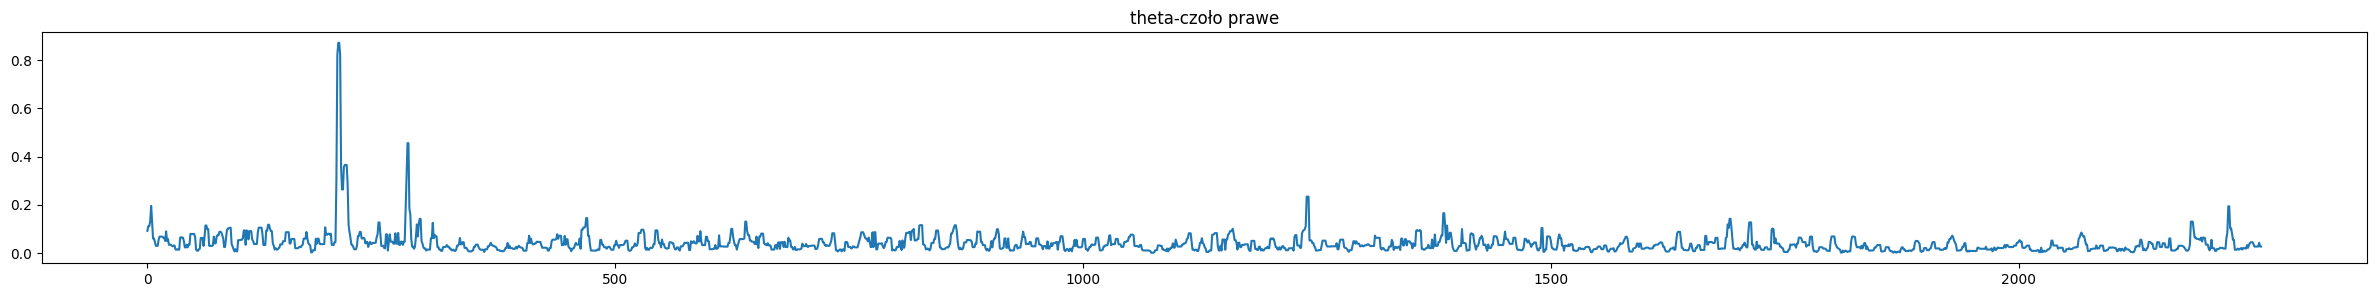

In [9]:
show_plots("alpha_low", 0)
show_plots("alpha_high", 0)
show_plots("beta", 0)
show_plots("gamma", 0)
show_plots("theta", 0)

## Prepare data

In [10]:
len(frequencies[0]["alpha_low"])

2260

In [11]:
y = [0] * 1440 + [1] * 820
y = y * 3

In [12]:
y = np.array(y)
y.shape

(6780,)

In [13]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
seq_length = 60

In [15]:
y = create_labels(y, seq_length)

In [16]:
y.shape

(6720,)

In [17]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [18]:
f_alpha_low = np.empty(0)
f_alpha_high = np.empty(0)
f_beta = np.empty(0)
f_gamma = np.empty(0)
f_theta = np.empty(0)

In [19]:
for i in [0]:
  f_alpha_low = np.append(f_alpha_low, frequencies[i]["alpha_low"])
  f_alpha_high = np.append(f_alpha_high, frequencies[i]["alpha_high"])
  f_beta = np.append(f_beta, frequencies[i]["beta"])
  f_gamma = np.append(f_gamma, frequencies[i]["gamma"])
  f_theta = np.append(f_theta, frequencies[i]["theta"])

for i in [4,5]:
  f_alpha_low = np.append(f_alpha_low, frequencies[i]["alpha_low"] * 100)
  f_alpha_high = np.append(f_alpha_high, frequencies[i]["alpha_high"] * 100)
  f_beta = np.append(f_beta, frequencies[i]["beta"] * 100)
  f_gamma = np.append(f_gamma, frequencies[i]["gamma"] * 100)
  f_theta = np.append(f_theta, frequencies[i]["theta"] * 100)


In [20]:
f_alpha_low.shape

(6780,)

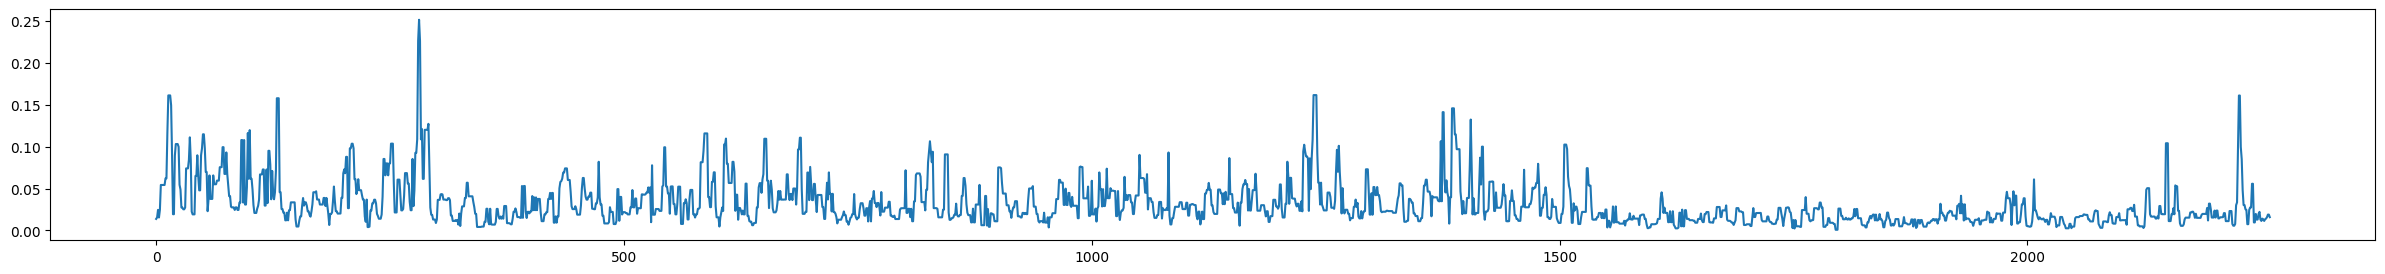

In [21]:
plt.figure(figsize=(30,3))
plt.plot(frequencies[0]["alpha_high"])

In [22]:
f_alpha_low[f_alpha_low > 0.25] = 0

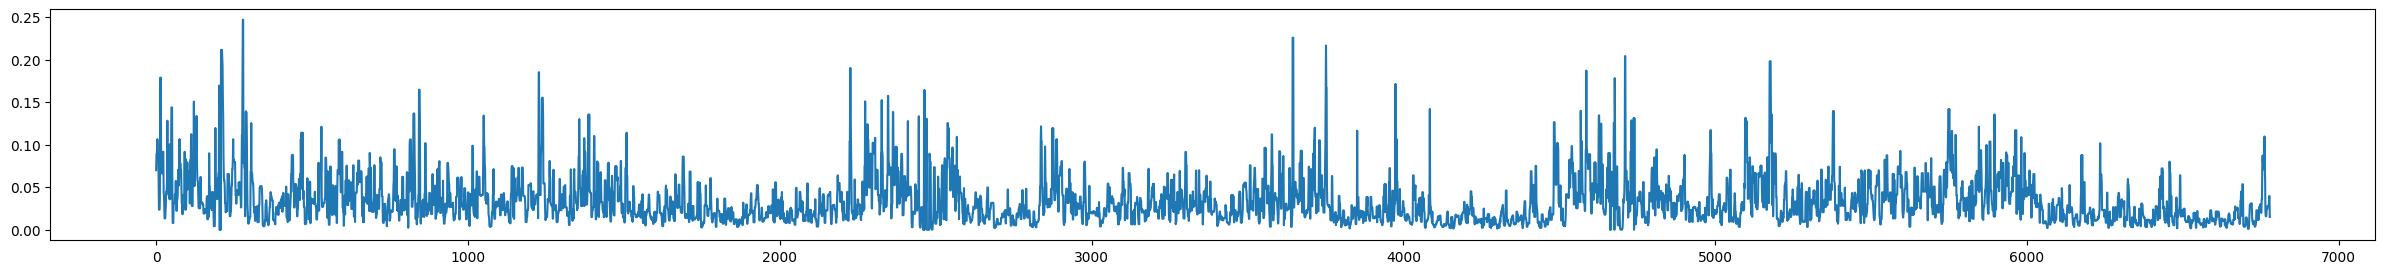

In [23]:
plt.figure(figsize=(30,3))
plt.plot(f_alpha_low)

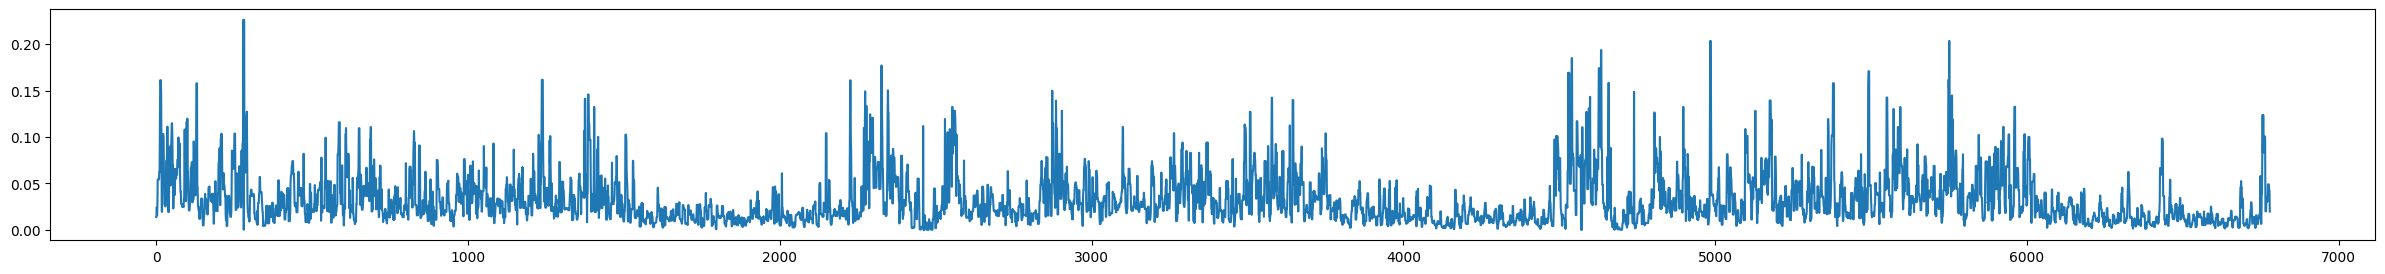

In [24]:
f_alpha_high[f_alpha_high > 0.25] = 0
plt.figure(figsize=(30,3))
plt.plot(f_alpha_high)

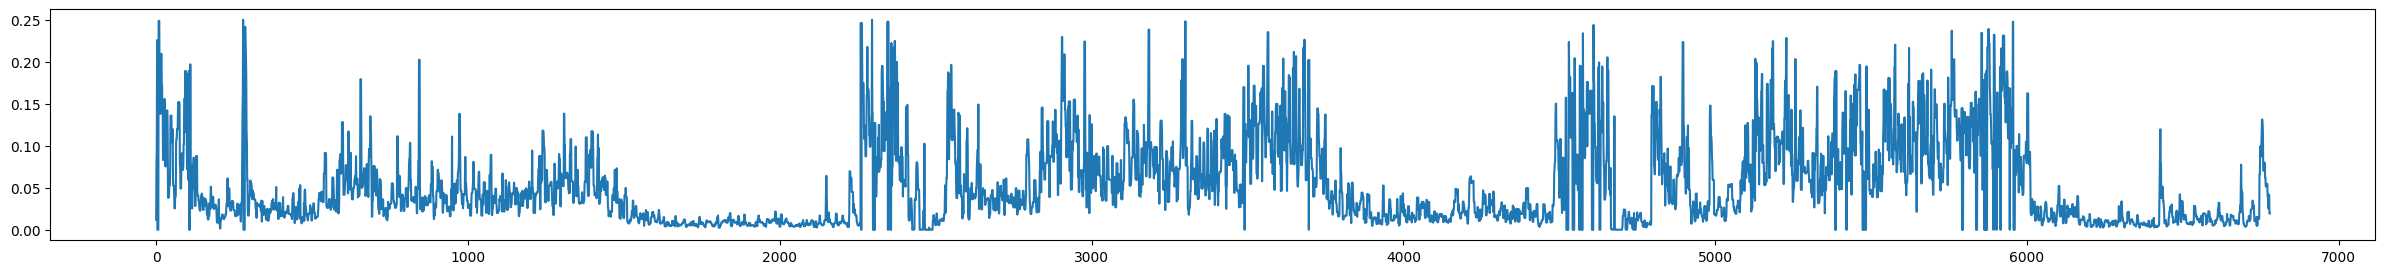

In [25]:
f_beta[f_beta > 0.25] = 0
plt.figure(figsize=(30,3))
plt.plot(f_beta)

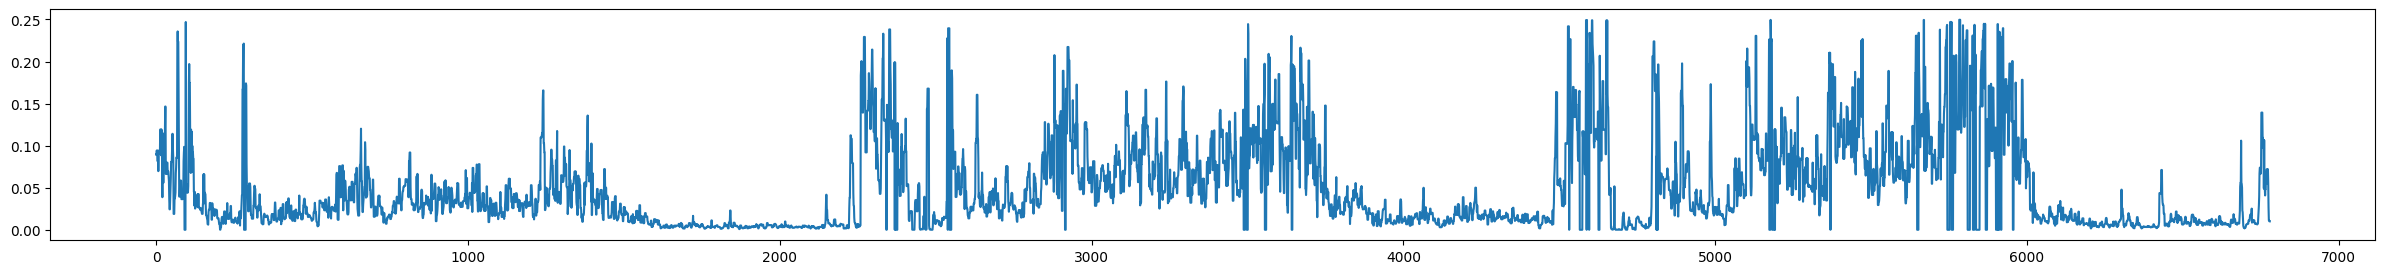

In [26]:
f_gamma[f_gamma > 0.25] = 0
plt.figure(figsize=(30,3))
plt.plot(f_gamma)

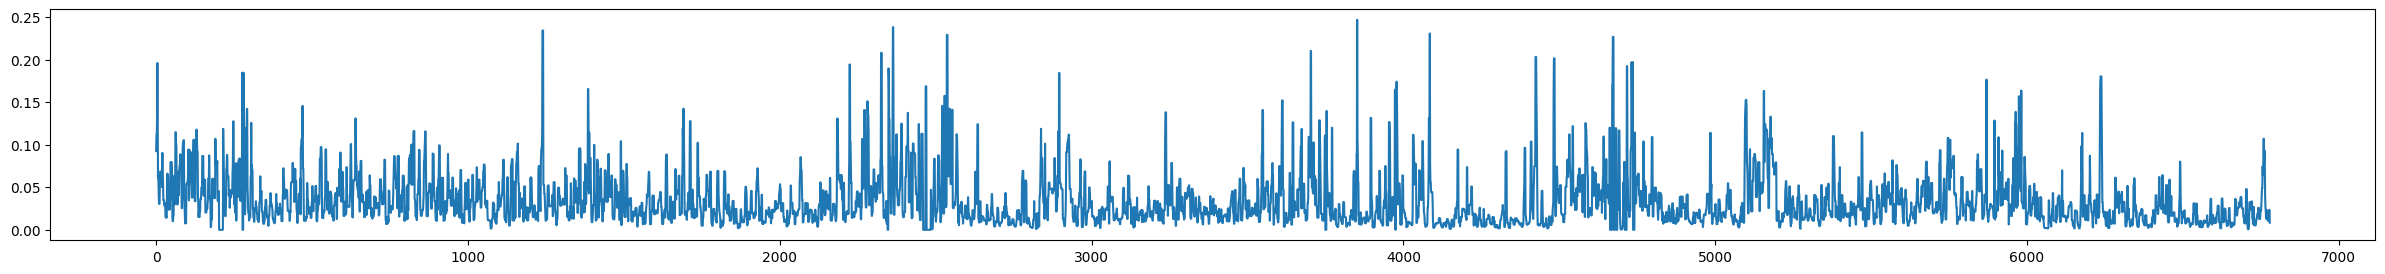

In [27]:
f_theta[f_theta > 0.25] = 0
plt.figure(figsize=(30,3))
plt.plot(f_theta)

In [28]:
data = np.array([create_sequences(f_alpha_low, seq_length),
                create_sequences(f_alpha_high, seq_length),
                create_sequences(f_beta, seq_length),
                create_sequences(f_gamma, seq_length),
                create_sequences(f_theta, seq_length)])

In [29]:
data.shape

(5, 6720, 60)

In [30]:
data[0][0]

array([0.07000401, 0.08874191, 0.08874191, 0.09589168, 0.10635378,
       0.09589168, 0.08843325, 0.08843325, 0.04927426, 0.02359997,
       0.02359997, 0.02359997, 0.03782293, 0.17874545, 0.17874545,
       0.17874545, 0.06950769, 0.06950769, 0.0662858 , 0.0662858 ,
       0.06992851, 0.06992851, 0.09171072, 0.09171072, 0.0446685 ,
       0.04026779, 0.02980106, 0.01334197, 0.01334197, 0.01334197,
       0.02187538, 0.02871899, 0.04416669, 0.04416669, 0.04833249,
       0.05838831, 0.1281012 , 0.05838831, 0.04833249, 0.04181217,
       0.04181217, 0.04002788, 0.04181217, 0.03592681, 0.10052811,
       0.03592681, 0.06163014, 0.06163014, 0.10192183, 0.14374096,
       0.14374096, 0.14374096, 0.04026195, 0.00800431, 0.00800431,
       0.00800431, 0.03115945, 0.03115945, 0.03115945, 0.03115945])

In [31]:
import random
permutation = np.random.permutation(data.shape[1])
max(permutation)

np.int64(6719)

In [32]:
# Apply the permutation to both arrays
data = data[:, permutation]
y = y[permutation]

In [33]:
data.shape

(5, 6720, 60)

In [34]:
train_data = data[:,0:5000]
test_data = data[:,5000:6720]
train_y = y[0:5000]
test_y = y[5000:6720]

In [35]:
print(train_data.shape)
print(test_data.shape)
print(train_y.shape)
print(test_y.shape)

(5, 5000, 60)
(5, 1720, 60)
(5000,)
(1720,)


# LSTM architecture
https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9137130

# Multiple input

In [36]:
from keras.api.layers import Input, Dense, Concatenate
from keras.api.models import Model

In [38]:
# Define input layers
input_alpha_low = Input(shape=(seq_length, 1), name='eeg_alpha_low')
input_alpha_high = Input(shape=(seq_length, 1), name='eeg_alpha_high')
input_beta = Input(shape=(seq_length, 1), name='eeg_beta')
input_theta = Input(shape=(seq_length, 1), name='eeg_theta')
# input_delta = Input(shape=(seq_length, 1), name='eeg_delta')
input_gamma = Input(shape=(seq_length, 1), name='eeg_gamma')
# input_ecg = Input(shape=(seq_length, 1), name='ecg')

lstm0 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1)) (input_alpha_low)
lstm1 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1)) (input_alpha_high)
lstm2 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1)) (input_beta)
lstm3 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1)) (input_theta)
lstm4 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1)) (input_gamma)
# lstm5 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1)) (input_ecg)

lstm0_2 = LSTM(units=32, input_shape=(seq_length, 1)) (lstm0)
lstm1_2 = LSTM(units=32, input_shape=(seq_length, 1)) (lstm1)
lstm2_2 = LSTM(units=32, input_shape=(seq_length, 1)) (lstm2)
lstm3_2 = LSTM(units=32, input_shape=(seq_length, 1)) (lstm3)
lstm4_2 = LSTM(units=32, input_shape=(seq_length, 1)) (lstm4)
# lstm5_2 = LSTM(units=32, input_shape=(seq_length, 1)) (lstm5)


combined = Concatenate()([lstm0_2, lstm1_2, lstm2_2, lstm3_2, lstm4_2])

# Define the final output layer
dense = Dense(32, activation="relu")(combined)
dense2 = Dense(32, activation="relu")(dense)
dense3 = Dense(32, activation="relu")(dense2)
output = Dense(1, activation='sigmoid')(dense)  # binary classification output

# Create the model
model = Model(inputs=[input_alpha_low, input_alpha_high, input_beta, input_theta, input_gamma], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
# Train the model
history = model.fit(x=[train_datatrain_data[0], train_data[1], train_data[2], train_data[3], train_data[4]], y=train_y, epochs=10, batch_size=32, validation_data=([test_data[0], test_data[1], test_data[2], test_data[3], test_data[4]], test_y))

Epoch 1/10


I0000 00:00:1734179150.051868  124367 cuda_dnn.cc:529] Loaded cuDNN version 90300


157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7167 - loss: 0.5574 - val_accuracy: 0.8401 - val_loss: 0.3935
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8532 - loss: 0.3798 - val_accuracy: 0.8674 - val_loss: 0.3366
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8850 - loss: 0.3171 - val_accuracy: 0.8669 - val_loss: 0.3401
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8746 - loss: 0.3145 - val_accuracy: 0.8924 - val_loss: 0.2801
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8912 - loss: 0.2748 - val_accuracy: 0.8552 - val_loss: 0.3599
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8858 - loss: 0.2905 - val_accuracy: 0.8901 - val_loss: 0.2822
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8983 - loss: 0.2572 - val_accuracy: 0.8233 - val_loss: 0.5462
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8932 - loss: 0.2696 - val_accuracy: 0.901

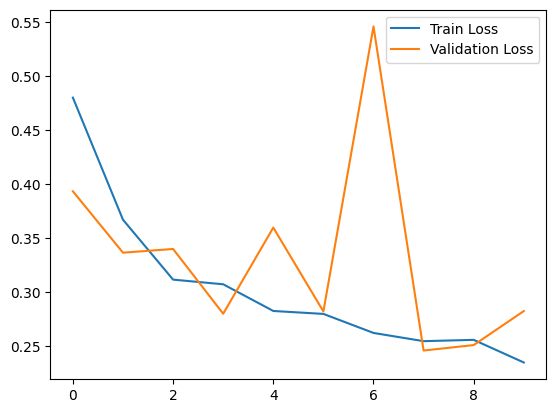

In [41]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [42]:
predicted = model.predict([test_data[0], test_data[1], test_data[2], test_data[3], test_data[4]])

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [43]:
test_y

array([0, 0, 0, ..., 1, 0, 1])

In [44]:
p = np.where(predicted > 0.5, 1, 0).flatten()
p

array([0, 0, 1, ..., 1, 0, 0])

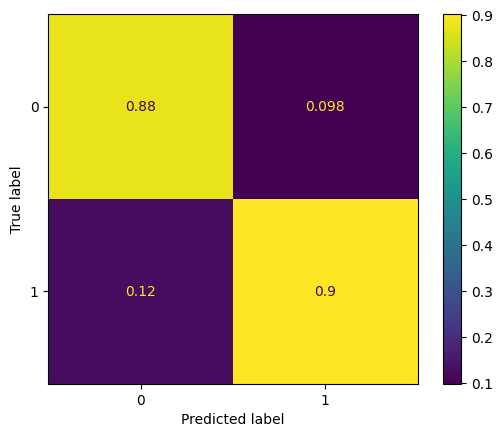

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

result = confusion_matrix(test_y, p , normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=result)
disp.plot()

# Single input signal

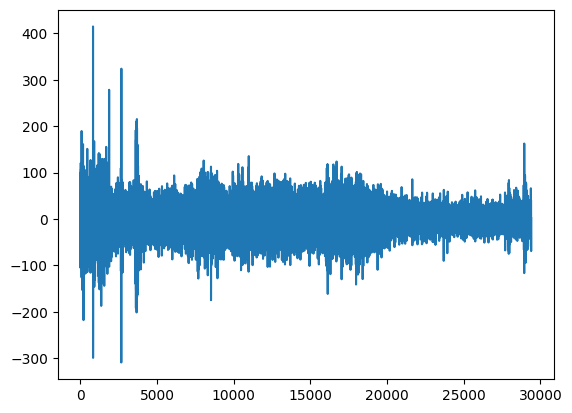

In [50]:
plt.plot(frequencies[0]["filtered"])

In [51]:
frequencies[0]["filtered"].shape

(29400, 1)

In [52]:
f_filtered = np.empty(0)

for i in [0]:
  f_filtered = np.append(f_filtered, frequencies[i]["filtered"])

for i in [4,5]:
  f_filtered = np.append(f_filtered, frequencies[i]["filtered"]* 10)



In [53]:
f_filtered.shape

(88200,)

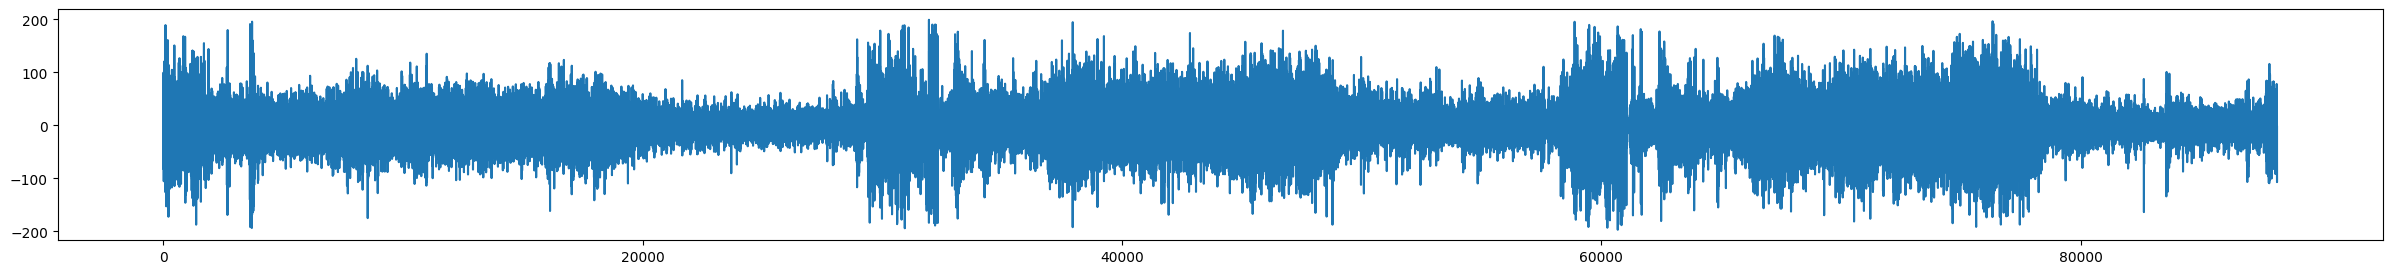

In [54]:
f_filtered[f_filtered > 200] = 0
f_filtered[f_filtered < -200] = 0
plt.figure(figsize=(30,3))
plt.plot(f_filtered)

In [55]:
data_filtered = create_sequences(f_filtered, seq_length)

In [56]:
data_filtered.shape

(88140, 60)

In [57]:
y = [0] * 18700 + [1] * 10700
y = y * 3
y = np.array(y)
y.shape

(88200,)

In [58]:
y = create_labels(y, seq_length)

In [59]:
y.shape

(88140,)

In [60]:
permutation = np.random.permutation(data_filtered.shape[0])
max(permutation)


88139

In [61]:
# Apply the permutation to both arrays
data_filtered = data_filtered[permutation]
y = y[permutation]

In [62]:
# Define input layer
input = Input(shape=(seq_length, 1), name='eeg_alpha_low')

lstm0 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1)) (input)
lstm1 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1)) (lstm0)
lstm2 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1)) (lstm1)
lstm3 = LSTM(units=32, input_shape=(seq_length, 1)) (lstm2)

# Define the final output layer
dense = Dense(32, activation="sigmoid")(lstm3)
dense2 = Dense(32, activation="sigmoid")(dense)
dense3 = Dense(32, activation="sigmoid")(dense2)
output = Dense(1, activation='sigmoid')(dense)  # binary classification output

# Create the model
model2 = Model(inputs=input, outputs=output)

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(num_classes=1, threshold=0.5)])

In [63]:
train_data = data_filtered[0:70000]
test_data = data_filtered[70000:88140]
train_y = y[0:70000]
test_y = y[70000:88140]

In [64]:
print(train_data.shape)
print(test_data.shape)
print(train_y.shape)
print(test_y.shape)

(70000, 60)
(18140, 60)
(70000,)
(18140,)


In [65]:
history = model2.fit(x=train_data, y=train_y, epochs=10, batch_size=32, validation_data=(test_data, test_y))

Epoch 1/10
2188/2188 [==============================] - 256s 113ms/step - loss: 0.3726 - accuracy: 0.8464 - f1_score: 0.7747 - val_loss: 0.3341 - val_accuracy: 0.8657 - val_f1_score: 0.8154
Epoch 2/10
2188/2188 [==============================] - 248s 113ms/step - loss: 0.3109 - accuracy: 0.8762 - f1_score: 0.8216 - val_loss: 0.2676 - val_accuracy: 0.9006 - val_f1_score: 0.8539
Epoch 3/10
2188/2188 [==============================] - 258s 118ms/step - loss: 0.2257 - accuracy: 0.9127 - f1_score: 0.8767 - val_loss: 0.1722 - val_accuracy: 0.9346 - val_f1_score: 0.9104
Epoch 4/10
2188/2188 [==============================] - 248s 113ms/step - loss: 0.1291 - accuracy: 0.9523 - f1_score: 0.9342 - val_loss: 0.0757 - val_accuracy: 0.9741 - val_f1_score: 0.9644
Epoch 5/10
2188/2188 [==============================] - 260s 119ms/step - loss: 0.0704 - accuracy: 0.9762 - f1_score: 0.9673 - val_loss: 0.0542 - val_accuracy: 0.9821 - val_f1_score: 0.9758
Epoch 6/10
2188/2188 [============================

In [66]:
predicted = model2.predict(test_data)

567/567 [==============================] - 17s 28ms/step


In [67]:
p = np.where(predicted > 0.5, 1, 0).flatten()
p

array([0, 0, 0, ..., 0, 1, 1])

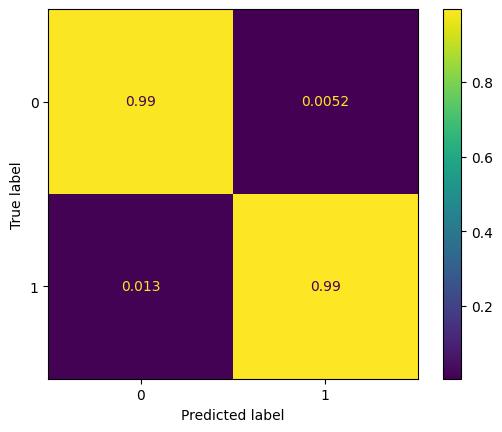

In [68]:
result = confusion_matrix(test_y, p , normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=result)
disp.plot()